In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import seaborn as sns
import scipy.stats as st
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [7]:
folder = Path('../../../data/this_project/1_e_coli_batch_cultures/')
div_folder = Path('../../../data/this_project/5_div/')

In [8]:

exometfn_A = folder / '1A_absolute_exometabolome_lcms.csv'
exometfn_B = folder / '1B_relative_exometabolome_z_scores.csv'
auc_dw_fn = folder/ '1F_auc_gDW.csv'

In [9]:
df_exo = pd.read_csv(exometfn_B, index_col=0)
df_exo = df_exo.reset_index().rename(columns = {'index':'Sample_id'})

# Remove outliers

In [10]:
df_exo.at[37, 'Creatinine'] = np.nan
df_exo.at[7, '2-hydroxyglutaric acid'] = np.nan
df_exo.at[0, 'Adipate'] = np.nan
df_exo.at[41, 'Glutamine'] = np.nan
df_exo.at[37, 'Glutamine'] = np.nan
df_exo.at[43, 'Glutamine'] = np.nan
df_exo.at[12, 'Diethanolamine'] = np.nan
df_exo.at[24, 'Diethanolamine'] = np.nan
df_exo.at[20, 'Histidine'] = np.nan
df_exo.at[7, 'Inosine'] = np.nan
df_exo.at[20, 'Inosine'] = np.nan
df_exo.at[16, 'Inosine'] = np.nan
df_exo.at[37, 'Inosine'] = np.nan
df_exo.at[10, 'Inosine'] = np.nan
df_exo.at[12, 'Inosine'] = np.nan
df_exo.at[24, 'Inosine'] = np.nan
df_exo.at[20, 'Isovalerylcarnitine (c5/ic5)'] = np.nan
df_exo.at[37, 'Isovalerylcarnitine (c5/ic5)'] = np.nan
df_exo.at[1, 'Lactate'] = np.nan
df_exo.loc[[19, 22, 10, 17, 33, 30], 'Malate'] = np.nan
df_exo.loc[[12, 23, 42, 24], 'Nicotinamide'] = np.nan
df_exo.at[18, 'Ophthalmate'] = np.nan
df_exo.loc[[16, 20, 23], 'Ophthalmate'] = np.nan
df_exo.loc[[16,20,40, 27], 'Phenylalanine'] = np.nan
df_exo.loc[[16, 20], 'Serine'] = np.nan


In [11]:
df_exo[['Carbon source', 'Timepoint', met]].sort_values(['Timepoint', met])

,Carbon source,Timepoint,NAD
39,L-alanine,0,-1.793992
4,Galactose,0,NaN
5,L-alanine,0,NaN
6,Galactose,0,NaN
16,L-malate,0,NaN
19,L-alanine,0,NaN
20,L-malate,0,NaN
27,L-malate,0,NaN
34,Galactose,0,NaN
11,Galactose,1,-1.083182


# Add growth data

In [12]:
df_auc = pd.read_csv(auc_dw_fn, index_col=0)

In [13]:
df1 = df_exo.merge(df_auc, left_on=('Bioreactor', 'Hours'), right_on=('Bioreactor', 'Hours'), how = 'left')


In [14]:
absolute_quant_mets = ['Phenylalanine', 'Leucine', 'Isoleucine', 'Methionine',
       'Gamma-aminobutyrate', 'Proline', 'Tyrosine', 'Valine',
       'Pipecolic acid', 'Alpha-aminobutyrate', 'Beta-alanine', 'Alanine',
       'Creatine', 'Alpha-aminoadipate', 'Glycine', 'Glutamine',
       'Glutamate', 'Serine', 'Asparagine', 'Aspartate', 'Lysine',
       'Pyruvate', 'Lactate', 'NAD', 'Succinate', 'Malate',
       'Cis-aconitate', 'Citrate', 'Isocitrate', 'Trans-aconitate',
       'Acetate', 'Formate', 'Propanoate']

In [15]:
df_exo

,Sample_id,Glutarylcarnitine (c5-dc),Trigonelline,Nicotinamide,Methylthioadenosine,Alpha-aminoadipate,Creatine,Creatinine,Glutamine,4-imidazoleacetate,...,Allantoin,Orotate,"2,5-dihydroxybenzoate",Dihydroorotate,Uracil,Salicylate,Timepoint,Hours,Carbon source,Bioreactor
0,SM_MPTA_112023_49_L-malate-T10_M5_19,-0.902605,-0.650426,-0.341651,0.327856,0.081929,NaN,-0.240147,2.470448,0.273870,...,0.570752,1.120955,1.328603,0.381378,-0.472593,0.564731,3,10.00,L-malate,REL04
1,SM_MPTA_112023_79_L-alanine-T16_M9_28,-0.924096,-0.772979,-0.359449,0.550911,-0.122935,1.270699,NaN,-0.336209,0.219423,...,-0.644395,-0.547000,-0.091136,-0.736041,-0.669959,-0.108499,2,16.00,L-alanine,REL07
2,SM_MPTA_112023_58_L-malate-T12_M5_22,-1.075369,0.453372,-0.205898,0.930166,-1.110680,-0.510990,-0.142655,-0.457065,-0.456261,...,0.725434,1.136518,1.658501,0.677889,0.899327,1.942975,4,12.00,L-malate,REL04
3,SM_MPTA_112023_28_Galactose-T6_M1_1,-1.080099,0.281544,-0.310824,-1.434182,NaN,-0.792203,-0.173316,-0.710027,-0.051331,...,-1.140607,-1.370215,-1.109794,-1.268637,NaN,-1.029553,1,6.00,Galactose,REL01
4,SM_MPTA_112023_M9_Galactose_001_40,-1.190318,1.381613,-0.262165,NaN,NaN,-0.850830,-0.265031,-0.724171,-0.021053,...,NaN,NaN,NaN,NaN,NaN,-1.010478,0,0.00,Galactose,NaN
5,SM_MPTA_112023_M9_L-alanine_001_37,-1.032362,-0.850446,-0.363331,NaN,NaN,1.714868,-0.315140,-0.770066,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.135507,0,0.00,L-alanine,NaN
6,SM_MPTA_112023_M9_Galactose_002_41,-1.399758,-0.188385,-0.132954,NaN,NaN,-0.642697,-0.209353,-0.766153,-0.371753,...,NaN,NaN,NaN,NaN,NaN,-0.745121,0,0.00,Galactose,NaN
7,SM_MPTA_112023_64_Galactose-T14_M1_7,-0.435338,-0.393769,-0.332584,0.349150,-0.784651,-0.396927,0.130015,-0.466601,0.434582,...,1.356693,0.714659,-0.250896,1.127536,-0.199835,0.098037,3,14.00,Galactose,REL01
8,SM_MPTA_112023_52_L-alanine-T10_M9_25,-1.211322,-0.728865,-0.354834,-0.982892,-1.243242,1.602554,-0.202119,-0.463024,-0.276302,...,-1.397128,-1.679806,-0.797433,-1.422506,-0.801319,-0.940228,1,10.00,L-alanine,REL07
9,SM_MPTA_112023_32_L-malate-T6_M6_14,0.154830,-0.705634,-0.355986,-1.468904,NaN,-0.688104,NaN,0.155152,-0.568538,...,-1.359011,-1.316864,-0.866973,-1.341616,NaN,-0.698086,1,6.00,L-malate,REL05


# Make long table

In [16]:
metabolites = sorted([x for x in df_exo.columns[:-4]])

In [17]:
both_data_sets = [x for x in absolute_quant_mets if x in metabolites]

In [18]:
df1.loc[df1.Timepoint.isin([1,2,3]), both_data_sets].notna().sum()

Phenylalanine          24
Leucine                19
Isoleucine             20
Methionine             19
Gamma-aminobutyrate    22
Proline                27
Tyrosine                6
Valine                 12
Pipecolic acid         23
Alpha-aminobutyrate     9
Beta-alanine           21
Alanine                13
Creatine               26
Alpha-aminoadipate     21
Glycine                 9
Glutamine              24
Glutamate              27
Serine                 27
Asparagine             27
Aspartate              26
Lysine                 19
Pyruvate               14
Lactate                26
NAD                    27
Succinate              21
Malate                 22
Cis-aconitate          27
Isocitrate             24
Trans-aconitate        22
dtype: int64

In [19]:
id_vars = ['Sample_id', 'Carbon source', 'Hours', 'AUC [gDW*h/L]', 'Bioreactor', 'Timepoint']
dfl  = df1.melt(id_vars=id_vars, value_vars=metabolites, value_name='Z-score', var_name = 'Metabolite')

In [20]:
dfl.loc[dfl['AUC [gDW*h/L]'].isna(), 'AUC [gDW*h/L]'] = 0

In [21]:
dfl.reset_index(inplace=True, drop = True)

# Store long dataframe

In [22]:
dfl.to_csv(folder/'1B_relative_exometabolome_z_scores_long.csv')

# Replace medium values with mean of medium values
The media samples are sampled from the same medium flask and thus  technical replicates of the metabolomics. 

In [23]:
# dfl_media_means = dfl.loc[dfl.Timepoint==0].groupby(['Carbon source', 'Metabolite']).agg({'Sample_id':'first', 'Hours':'first', 'AUC [gDW*h/L]':'first',
#                                                     'Bioreactor':'first', 'Z-score':np.nanmean, 'Timepoint':'first'}).reset_index()
# dfl = dfl.loc[dfl.Timepoint!=0]


In [24]:
# dfl = pd.concat([dfl, dfl_media_means])

# Fit rate per carbon source

In [25]:
met = 'Creatine'

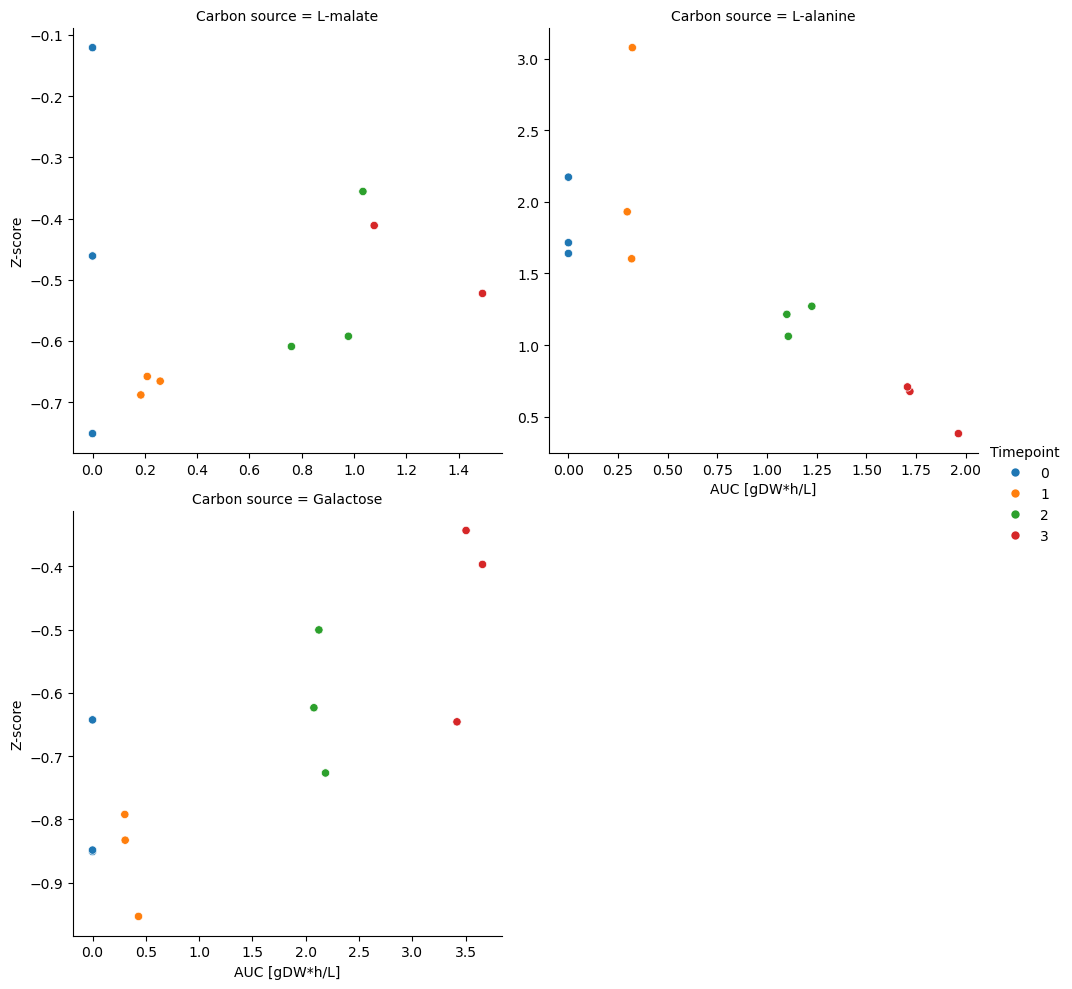

In [26]:
ax = sns.relplot(data = dfl.loc[(dfl.Timepoint.isin([0, 1,2,3]))&(dfl.Metabolite==met),:], x = 'AUC [gDW*h/L]', y = 'Z-score', 
                 hue = 'Timepoint', col = 'Carbon source', col_wrap=2, facet_kws={'sharey': False, 'sharex':False}, palette = 'tab10')


In [27]:
dfl.loc[dfl.Bioreactor.isna(), 'Bioreactor'] = 'Medium'

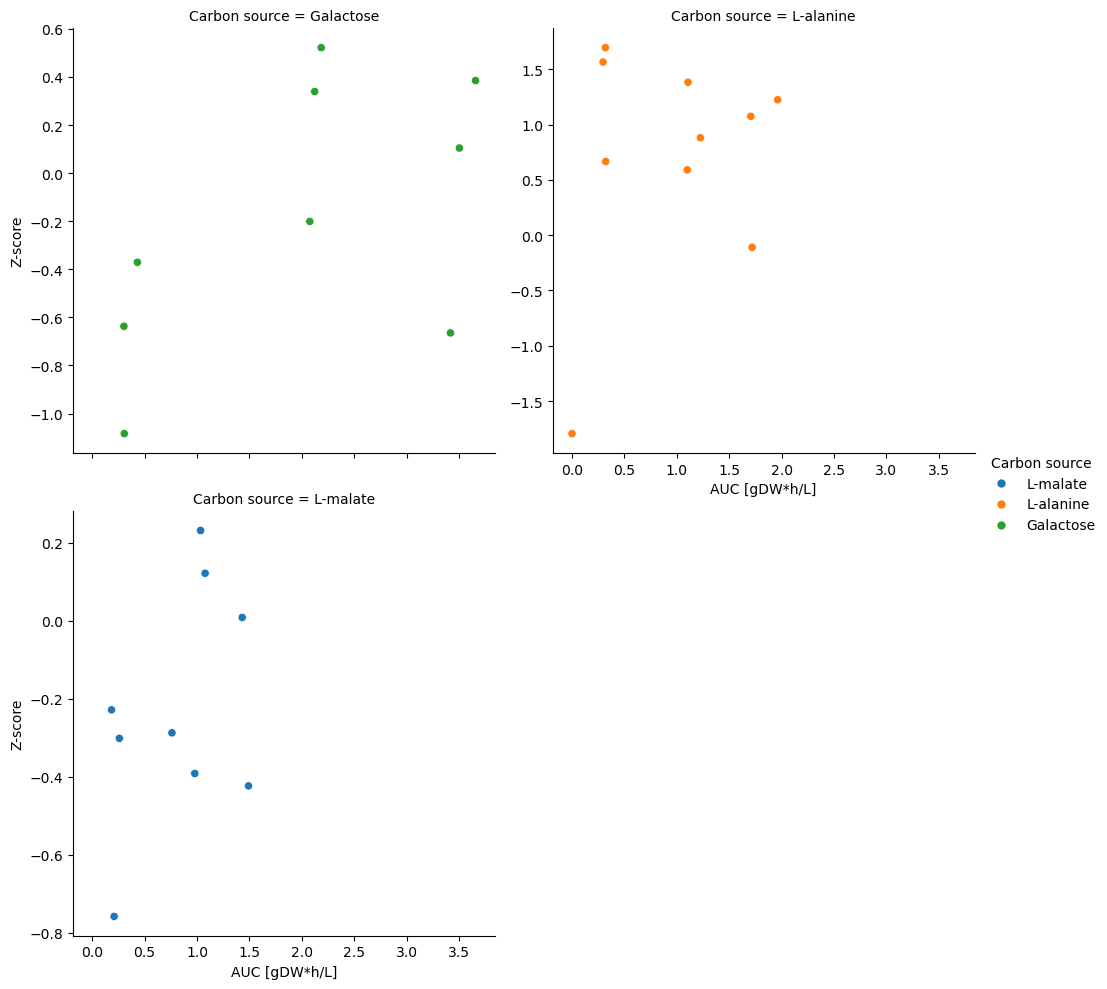

In [28]:
met = 'NAD'
ax = sns.relplot(data = dfl.loc[(dfl.Timepoint.isin([0, 1,2,3]))&(dfl.Metabolite==met),:], x = 'AUC [gDW*h/L]', y = 'Z-score', 
                 col = 'Carbon source', hue = 'Carbon source', col_wrap=2, facet_kws={'sharey': False}, col_order=['Galactose', 'L-alanine', 'L-malate'])


# Fit slopes

L-malate, Asparagine, not T3, pval 1.70e-02
L-alanine, Asparagine, not T3, pval 1.73e-02
L-malate, Aspartate, not T3, pval 7.62e-03
L-alanine, Creatinine, not T3, pval 1.49e-02


/Users/snorre/miniconda3/envs/reframed/lib/python3.9/site-packages/scipy/stats/_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
/Users/snorre/miniconda3/envs/reframed/lib/python3.9/site-packages/scipy/stats/_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


L-alanine, Homoserine, not T3, pval 3.25e-02
366


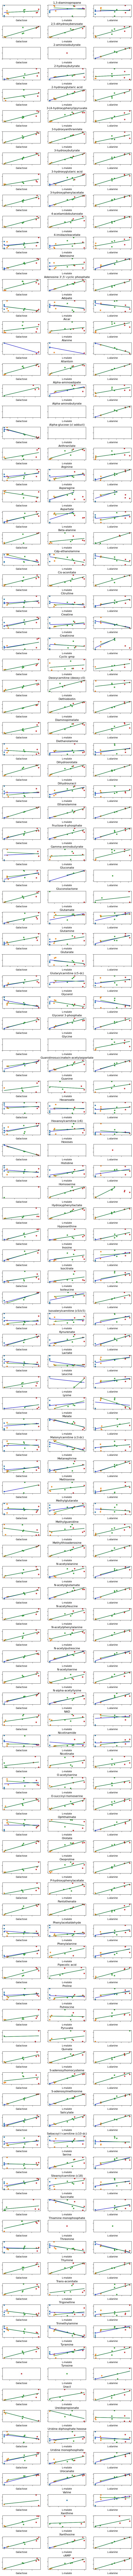

In [29]:
ttest_t2t3_pval_threshold = 0.05
i = 0
plot = True
data = []
carbon_sources = ['Galactose', 'L-malate', 'L-alanine']
if plot:
    fig, axes = plt.subplots(122,3, figsize = (10,200))
    axes = axes.flatten()
for met in dfl.Metabolite.unique():
    for cs in carbon_sources:
        if plot:
            ax = axes[i]
        idx = (dfl.Metabolite==met)&(dfl['Carbon source']==cs)&(dfl.Timepoint<4)
        dfi = dfl.loc[idx]
        
        timepoints = [0,1,2,3]
        idx_fit_0 = dfi.Timepoint.isin(timepoints)&dfi['Z-score'].notna()
        x_values_0 = dfi.loc[idx_fit_0,'AUC [gDW*h/L]'].values
        y_values_0 = dfi.loc[idx_fit_0, 'Z-score'].values
        
        t3_values = dfi.loc[(dfi.Timepoint==3), 'Z-score'].values #&dfi['Z-score'].notna()
        t2_values = dfi.loc[(dfi.Timepoint==2), 'Z-score'].values #&dfi['Z-score'].notna()
        
        if len(t3_values) and len(t3_values):
            ttest_t2t3 = st.ttest_ind(t2_values, t3_values, nan_policy='omit', alternative='greater')
            t3t2_pval = ttest_t2t3.pvalue
        else:
            t3t2_pval = np.nan

        if plot:
            sns.scatterplot(dfi, x = 'AUC [gDW*h/L]', y = 'Z-score', ax = ax, hue = 'Timepoint',
                               palette = 'tab10', legend = None)   
        if len(y_values_0)>=3:
            slope_0, intercept_0, rvalue_0, pvalue_0, stderr_0 = st.linregress(x_values_0, y_values_0)
            # print(cs, met, slope_0, t3t2_pval)
            if (slope_0 > 0) and (t3t2_pval < ttest_t2t3_pval_threshold):
                timepoints = [0,1,2]
                idx_fit_0 = dfi.Timepoint.isin(timepoints)&dfi['Z-score'].notna()      
                x_values_0 = dfi.loc[idx_fit_0,'AUC [gDW*h/L]'].values
                y_values_0 = dfi.loc[idx_fit_0, 'Z-score'].values
                slope_0, intercept_0, rvalue_0, pvalue_0, stderr_0 = st.linregress(x_values_0, y_values_0)
                print(f'{cs}, {met}, not T3, pval {ttest_t2t3.pvalue:.2e}')

            
            if plot:
                xarr_0 = np.linspace(x_values_0.min(), x_values_0.max(), 10, endpoint=True)
                yfit_0 = intercept_0 + slope_0*xarr_0
                ax.plot(xarr_0, yfit_0, c = 'b')
        else:
            slope_0 = intercept_0 = rvalue_0 = pvalue_0 = stderr_0 = np.nan

        timepoints.pop(0)
        idx_fit = dfi.Timepoint.isin(timepoints)&dfi['Z-score'].notna()
        x_values = dfi.loc[idx_fit,'AUC [gDW*h/L]'].values
        y_values = dfi.loc[idx_fit, 'Z-score'].values
        
        if len(y_values)>=3:
            slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

            if plot:
                xarr = np.linspace(x_values.min(), x_values.max(), 10, endpoint=True)
                yfit = intercept + slope*xarr 
                ax.plot(xarr, yfit, c = 'g')
        else:
            slope = intercept = rvalue = pvalue = stderr = np.nan
                
        

        data.append([cs, met, t3t2_pval, slope, intercept, rvalue, pvalue, stderr, len(y_values),
                        slope_0, intercept_0, rvalue_0, pvalue_0, stderr_0, len(y_values_0)])

        
        if plot:
            ax = axes[i]
            ax.set(yticklabels=[], xticklabels=[])
            ax.set_xlabel(cs)
            ax.set_ylabel(None)
            if cs == 'L-malate':
                ax.set_title(met)
            # ax.set_title(f'{cs}: {met}, {res.pvalue:.1e}, {res.slope:.3f}, {res.stderr:.3f}, [{res.slope - res.stderr:.3f},  {res.slope + res.stderr:.3f}]')
        i+= 1
print(i)
if plot:
    plt.subplots_adjust(hspace=0.8)
    plt.savefig('fitted_rates.pdf')
    plt.show()

In [30]:
df_fit = pd.DataFrame(data, columns=['Carbon source', 
                      'Metabolite', 'T3_pval', 'Slope', 'Intercept', 'r', 'p-value', 'Std. Err', 'N',
                                    'Slope_0', 'Intercept_0', 'r_0', 'p-value_0', 'Std. Err_0', 'N_0'])

### PCA

In [39]:
sample_id_to_cs = df_exo.set_index('Sample_id')['Carbon source'].to_dict()
sample_id_to_t = df_exo.set_index('Sample_id')['Timepoint'].astype(int).to_dict()

[0.26445904 0.14104163 0.11217497 0.07604324]


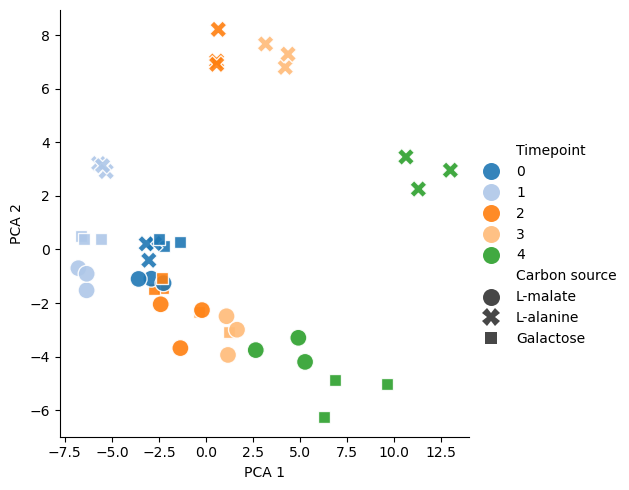

<Figure size 640x480 with 0 Axes>

In [42]:
pca = PCA(n_components=4)
X = df_exo.set_index('Sample_id').iloc[:, :-4]
X_std =X.std(axis=0)
X_std[X_std==0]=1
Xi = (X-X.mean(axis = 0))/X_std
Xi.fillna(0, inplace=True)
# Xi.fillna(Xi.min(axis=0), inplace=True)
# imputer = SimpleImputer()
# Xi = imputer.fit_transform(X)
fit = pca.fit(Xi)
fitT = pca.fit_transform(Xi)
print(fit.explained_variance_ratio_)
pca_df_s = pd.DataFrame(fitT, columns = ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4'])
pca_df_s['SID'] = Xi.index
# pca_df_s['Strain'] = pca_df_s['SID'].map(cid_dict_s)
pca_df_s['Carbon source'] = pca_df_s['SID'].map(sample_id_to_cs)
pca_df_s['Timepoint'] = pca_df_s['SID'].map(sample_id_to_t)

# pca_df_s['Type'] = pca_df_s['SID'].map(cid_dict_t)
# pca_df_s['OD'] = [cid_strain_cs_od[strain, met] for met in pca_df_s['Carbon_Source']]
# df_list.append(pca_df_s)

# pca_df = pd.concat(df_list)
sns.relplot(data = pca_df_s, x = 'PCA 1', y = 'PCA 2', style = 'Carbon source', hue = 'Timepoint', palette='tab20', s = 150, facet_kws={'sharey': False, 'sharex': False}, alpha = 0.9)#, hue_order=['S','A'])
plt.show()
plt.savefig('pca_untargeted_sintef_23.pdf')

# Read in absolute quantified LCMS data

In [124]:
df_lcmsL = pd.read_csv('absolute_concentrations_sintef_snorre.csv', index_col=0)

In [129]:
df_merged = df_lcmsL.loc[:,['Hours', 'Bioreactor', 'Metabolite', 'Carbon source', 'Concentration [uM]']].merge(dfl, 
                            left_on=('Hours', 'Bioreactor', 'Metabolite', 'Carbon source'), right_on=('Hours', 'Bioreactor', 'Metabolite', 'Carbon source'), how = 'left')


In [130]:
dfl.loc[dfl.Metabolite=='Glutamine']

,Sample_id,Carbon source,Hours,AUC [gDW*h/L],Bioreactor,Timepoint,Metabolite,Z-score
1980,SM_MPTA_112023_49_L-malate-T10_M5_19,L-malate,10.00,1.431303,REL04,3,Glutamine,2.470448
1981,SM_MPTA_112023_79_L-alanine-T16_M9_28,L-alanine,16.00,1.224939,REL07,2,Glutamine,-0.336209
1982,SM_MPTA_112023_58_L-malate-T12_M5_22,L-malate,12.00,2.865122,REL04,4,Glutamine,-0.457065
1983,SM_MPTA_112023_28_Galactose-T6_M1_1,Galactose,6.00,0.302723,REL01,1,Glutamine,-0.710027
1984,SM_MPTA_112023_M9_Galactose_001_40,Galactose,0.00,0.000000,Medium,0,Glutamine,-0.724171
1985,SM_MPTA_112023_M9_L-alanine_001_37,L-alanine,0.00,0.000000,Medium,0,Glutamine,-0.770066
1986,SM_MPTA_112023_M9_Galactose_002_41,Galactose,0.00,0.000000,Medium,0,Glutamine,-0.766153
1987,SM_MPTA_112023_64_Galactose-T14_M1_7,Galactose,14.00,3.657265,REL01,3,Glutamine,-0.466601
1988,SM_MPTA_112023_52_L-alanine-T10_M9_25,L-alanine,10.00,0.318235,REL07,1,Glutamine,-0.463024
1989,SM_MPTA_112023_32_L-malate-T6_M6_14,L-malate,6.00,0.184747,REL05,1,Glutamine,0.155152


Phenylalanine 5 9
1.24, 0.998, 1.31e-35


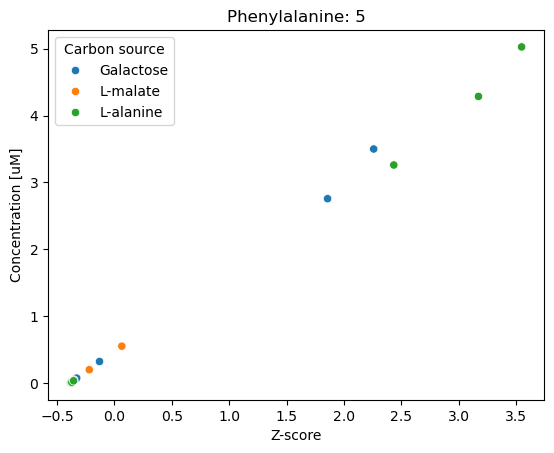

Proline 7 5
0.20, 0.964, 2.34e-20


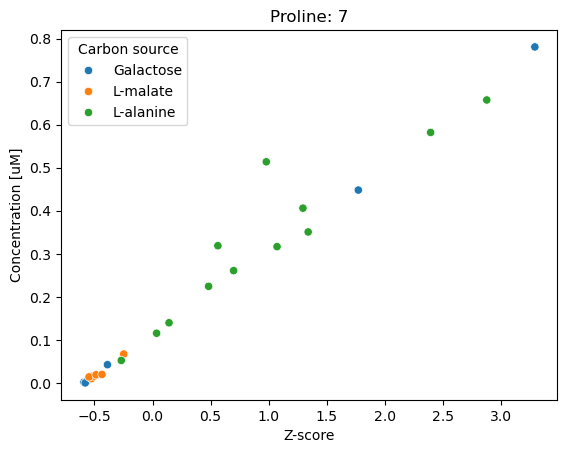

Alanine 1 4
5447.68, 0.965, 1.78e-02


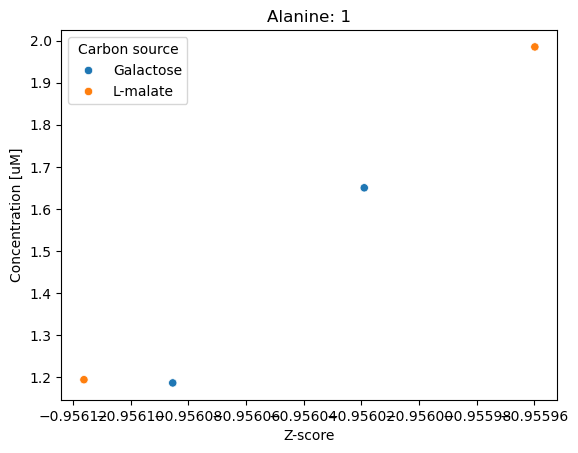

Creatine 6 7
0.01, 0.812, 2.57e-11


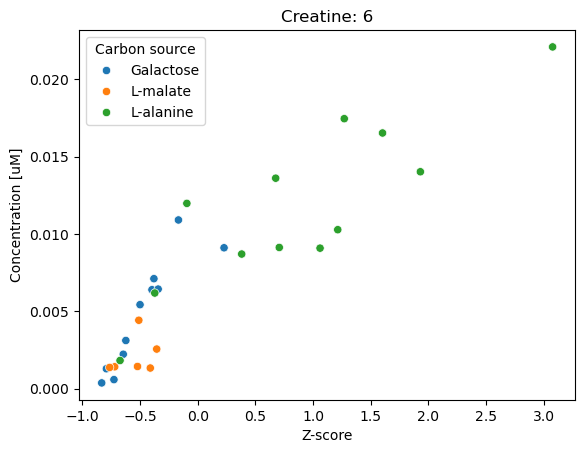

Alpha-aminoadipate 4 0
0.01, 0.065, 2.10e-01


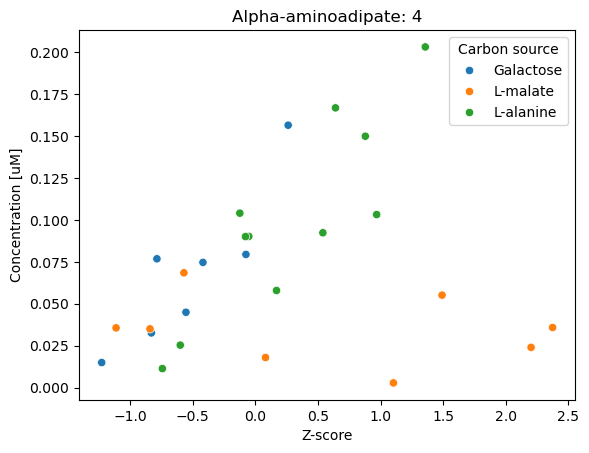

Glutamine 19 3
0.03, 0.194, 3.83e-01


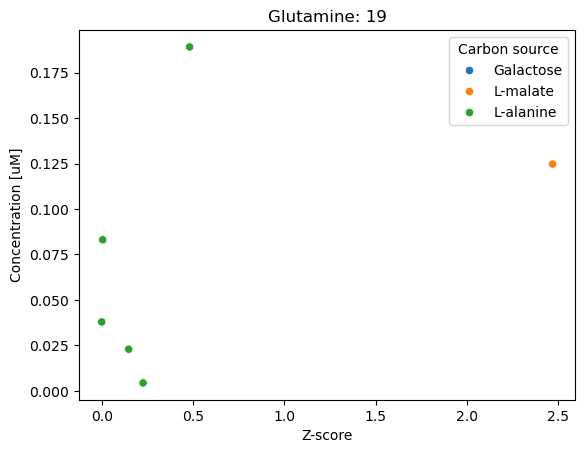

Serine 18 1
0.55, 0.757, 2.50e-05


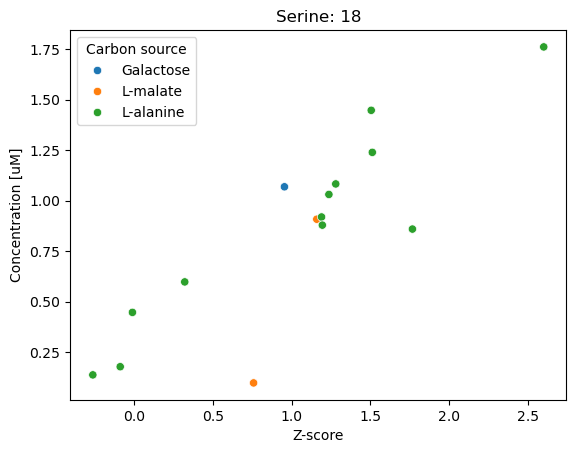

Lysine 9 0
11.81, 0.998, 4.93e-17


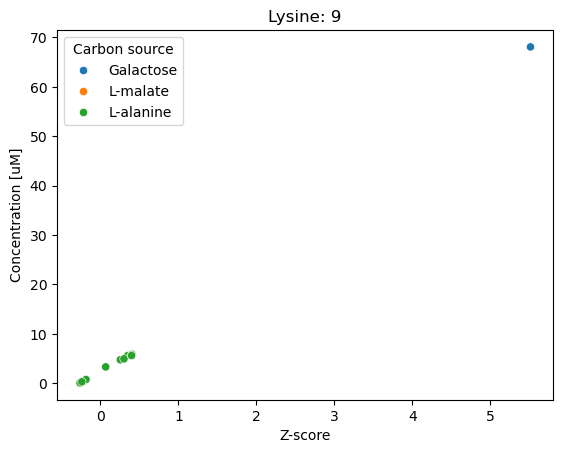

Lactate 7 7
3.08, 0.976, 1.11e-21


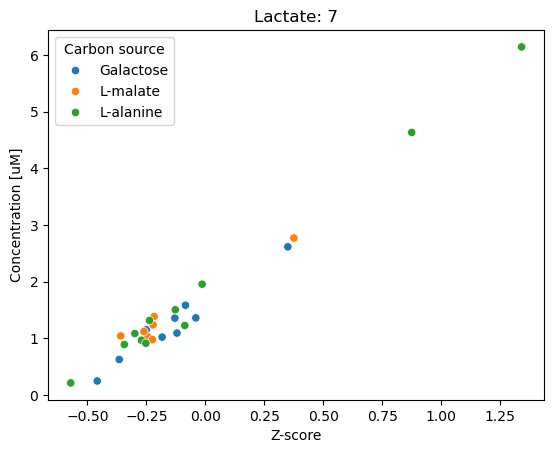

NAD 7 0
0.01, 0.369, 1.64e-03


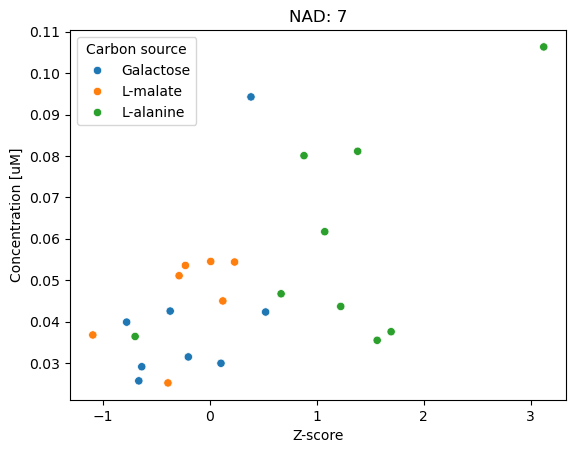

Isocitrate 8 0
0.11, 0.014, 5.67e-01


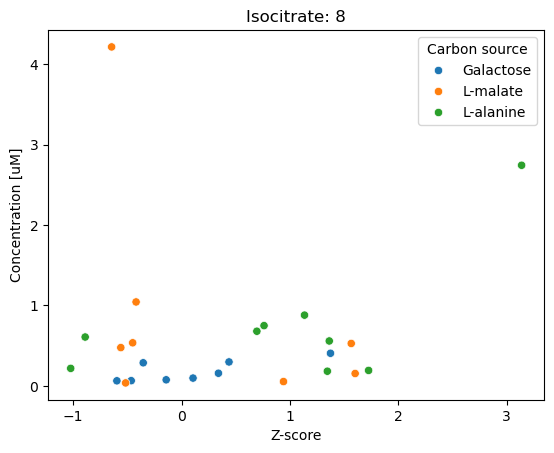

In [172]:
for met in df_merged.Metabolite.unique():
    dfi = df_merged.loc[df_merged.Metabolite==met]
    missing = dfi.Timepoint.isin([1,2,3])&dfi['Concentration [uM]'].isna()&dfi['Z-score'].notna()
    missing_other_way = (dfi['Concentration [uM]'].notna()&dfi['Z-score'].isna()).sum()
    n_missing = missing.sum()
    if n_missing > 0:
        ax = sns.scatterplot(dfi, y = 'Concentration [uM]', x = 'Z-score', hue = 'Carbon source')
        notnan = dfi['Concentration [uM]'].notna()&dfi['Z-score'].notna()
        y_values = dfi.loc[notnan,'Concentration [uM]'].values
        x_values = dfi.loc[notnan, 'Z-score'].values
        res = st.linregress(x_values, y_values)
        print(met, n_missing, missing_other_way)
        print(f'{res.slope:.2f}, {res.rvalue**2:.3f}, {res.pvalue:.2e}')
        ax.set_title(f'{met}: {n_missing}')
        plt.show()
        